# Higidura Browndarraren errealizazio bat 2D-n eta 3D-n

## 1. Librerien inportazioa

In [2]:
import matplotlib as mpl
mpl.use('nbagg')

import numpy as np
import math
import matplotlib.pyplot as plt
from scipy.constants import k              # Boltzmann-en ktea 
from mpl_toolkits.mplot3d import Axes3D    # 3D-tan marrazteko mplot3d modulutik Axes3D inportatu

plt.style.use('bmh')

Hemen, partikula Browndarraren higidura simulatuko duen programa idatzi dut. Beti bezala, libreria numerikoak eta plotting-erako beharrezkoak izango ditudanak inportatuko ditut lehenbizi. 

Plot honetan, Browndar partikulen traiektoriak marraztu nahi ditudanez 3 dimentsiotan (hori da helburua, behintzat), **matplotlib** libreria eta **mplot3d** modulua erabiliko ditut. 

**1. Zergatik erabili 'nbagg' backend-a?**

_"nbagg" enables interactive figures in a live IPython notebook session. Once figures are created and then subsequently shown, they will placed in an interactive widget inside the notebook allowing panning and zooming in the same way as any other matplotlib backend. Because figures require a connection to the IPython notebook server for their interactivity, once the notebook is saved, each figure will be rendered as a static image - thus allowing non-interactive viewing of figures on services._ (https://matplotlib.org/users/prev_whats_new/whats_new_1.4.html#the-nbagg-backend).


**2. Nola egin 3D-ko plot-ak?**

Informazio guztia hurrengo web orrialdetik atera dut: https://jakevdp.github.io/PythonDataScienceHandbook/04.12-three-dimensional-plotting.html. 


**3. Interfaze ezagun bat daukagu eskuetan:**

Ohartu, **matplotlib** libreriaren barruan daukagun *pyplot* moduluari esker, MATLAB-en itxurako interfaze bat izango dugula, matplotlib.org orrialdetik: "*For the power user, you have full control of line styles, font properties, axes properties, etc, via an object oriented interface or via a set of functions familiar to MATLAB users.*" Ni MATLABekin eroso sentitzen naizenez, libreria hau inportatzeak lana arras erraztuko dit. 


**4. Ze estilotan egin plot-a?**

Estilo ezberdinak hurrengo web orrialdean: https://matplotlib.org/gallery/style_sheets/style_sheets_reference.html.

Interesgarria izan litekeena erabilgarriak diren plot guztien zerrenda lortzeko: *print(plt.style.available)*.

## 2. Parametroen def. eta aldagaien hasieratzea

In [3]:
# ----------- PARAMETROAK ---------------
dim = 3
dt = 0.05

#m=2.4e-10                        # Pollen-aren grano baten masa, kg-tan                     
#eta = 0.001                      # \eta_{H_2O}=0.001 Pa·s = 0.001 kg/m/s (20ºC-tan)
#r_part = 45e-6                   # r_pollen_grain = (6-90) µm
#gamma = 6*np.pi*eta*r_part

m = 1.0  
gamma = 1.0 
kBT = 1.0                         # Tenperatura [K], abiadura \sqrt(3) [m/s] izan daiten
sigma = np.sqrt(2*gamma*kBT*dt)   # Desbideratze estandarra (ausazko indarraren modelizazioaren anplituderako)
n_part = 50
n_pausu = 1000

# --------- ALDAGAI HASIERATUAK ----------
R = np.zeros([n_part,dim])
V = np.zeros([n_part,dim])
W = np.zeros([n_part,dim])
R_t = np.zeros([n_pausu,n_part,dim])
V_t = np.zeros([n_pausu,n_part,dim])
W_t = np.zeros([n_pausu,n_part,dim])
denbora = np.zeros([n_pausu])

Hemen, **simulazioaren parametroak** espezifikatzen ditut. 3D-n egingo dut lan, x, y eta z koordenatuekin, eta $n_p=50$ partikula browndar independenterekin. 

Simulazio-pausu kopurua 1024-koa da, $\Delta t = 0.05$ izanik (simulazio-unitatetan). 

$\gamma=1.0$ jarri dut, orokortasunik galdu gabe (honi dagokion balio zehatzagoa erantsi diezazkioket geroago). KONTUZ! $m=k_BT=1.0$ hartu dut. Hauez ez dira, oro har, balio errealistak, baina ez dut orokortasunik galduko (eta bestela arazoak ditut pythonen ejekutatzeko. Josuri galdetu).

D_est konstantea sortu dut, "cumulative impulse"-aren anplitudea ematen diguna (F11).

Bigarren atalean, simulaziorako behar izango ditudan array guztiak sortu eta inizializatzen ditut. 

$R$: Posizioa. $V$: Abiadura. $W$: Auzazko indarra (partikulan eragindakoa). **DENBORA-PAUSU AKTUALEAN**.
$R_t$, $V_t$ eta $W_t$ **TRAIEKTORIA OSOARI DAGOZKIEN** posizio, abiadura eta auzazko indarra dira. 

Denbora array-ean pausu bakoitzerako denbora-tarteak daude. 

## 3. Simulazioa

In [4]:
np.random.seed(0)           # hazia hasieratu
for i in range(n_pausu):
    W = sigma*np.random.randn(n_part,dim)
    V = (1-gamma/m*dt)*V+W/m
    R = R + V*dt
    R_t[i,:,:]=R
    V_t[i,:,:]=V
    W_t[i,:,:]=W
    denbora[i] = i*dt

Kodearen atal nagusi/garrantzitsuena hauxe da. Simulazioa burutzeko, behin da berriz ebazten dugu ekuazioa partikula jakinaren posizio eta abiadurak kalkulatzeko (F5 eta F9 ekuazioei jarraituz). Honetarako, for loop-a erabili dut, 0-tik nums-1 -eraino dihoana. 

Loop-aren iterazio bakoitzean, aldiuneko posizio, abiadura eta auzazko indarra erabiltzen dira partikularen konfigurazioa eguneratzeko. Auzazko indarra (partikula eta norabide espazial bakoitzerako) banaketa Gaussiar batek ematen digu (non desbideraketa estandarra "d_est" den eta "randn" funtzioa erabiliz batazbestekotik, era aleatorioan mugitzen garen).

Hau da, banaketa Gaussiarrari jarraitzen dion aldagai-sorta bat sor genezake hurrengo eran:

$$x_i = \mu + \sigma*np.random.randn(N)$$

Gure kasuan $\mu=0$ da eta desbideratze-estandarrak erakutsiko dugu, batazbestean datuak zenbateraino desplaza daitezkeen $\mu$ hortatik. 

Aldiuneko posizio eta abiadurak ebatzi eta gero, Rs, Vs eta Ws array-etan gordeko ditugu datu hauek guztiak. 

## 4. Partikulen ibilbideen plot-a, 2D-ko planoan

<IPython.core.display.Javascript object>


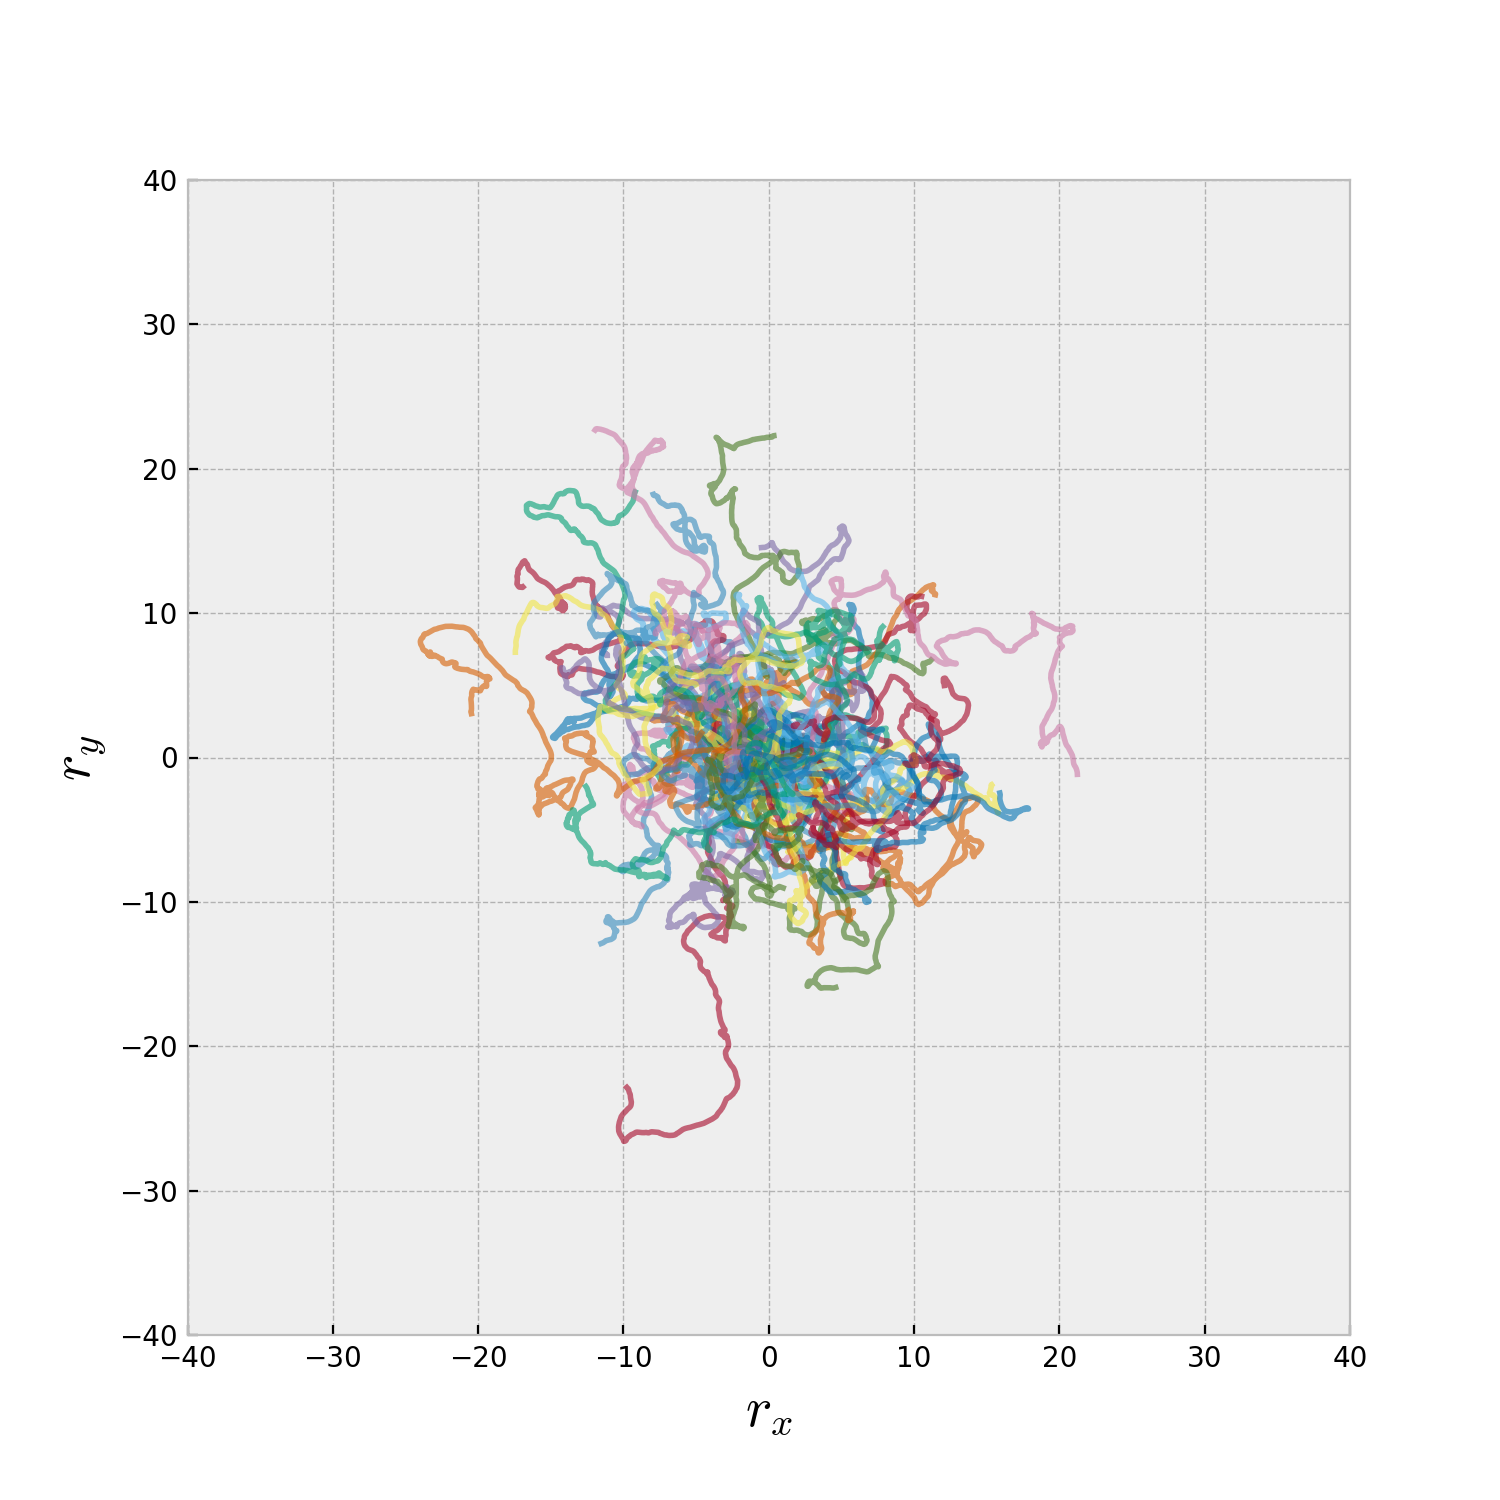

In [5]:
fig, ax = plt.subplots(figsize=(7.5,7.5),dpi=100) # 7.5x7.5 pulgada eta dpi=dots-per-inch
ax.set_xlabel(r"$r_x$", fontsize=20) # x-label
ax.set_ylabel(r"$r_y$", fontsize=20) # y-label
plt.xlim(-40,40) # x-range
plt.ylim(-40,40) # y-range

for n in range(n_part): # errepikatu n=0tik nump-1eraino
    ax.plot(R_t[:,n,0],R_t[:,n,1],alpha=0.6) # partikula guztien ibilbideak marraztu
    
plt.show()

Definizioz, partikula guztiek browndar higidura deskriba dezakete x, y eta z koordenatuetan, era independentean. $R_x(t)$, $R_y(t)$ eta $R_Z(t)$, partikulen posizio tenporalak zehazten dituzten aldagaiak dira. 

**Matplotlib-en web orrialdetik**

*Matplotlib allows DPI and figure size to be specified when the Figure object is created, using the figsize and dpi keyword arguments. figsize is a tuple of the width and height of the figure in inches, and dpi is the dots-per-inch (pixel per inch). To create an 800x400 pixel, 100 dots-per-inch figure, we can do:*

fig = plt.figure(figsize=(8,4), dpi=100)

Higidura era erraz batean ikustarazteko, lehenbizi *n_part* partikula hauen traiektoriak marraztuko ditugu x-y planoan. 

Kasu honetan, z ardatzeko higidurak ezin ditugu ikusi, baina azter genitzake x-z edota y-z planoak marraztuz. 

Ibilbideen dentsitateak **simetria esferiko** bat erakusten du, eta dentsitatearen **maximoa jatorrian** dago, partikulak hasieran kokatzen diren puntuan. 

## 4. 3D-ko plot-a

<IPython.core.display.Javascript object>


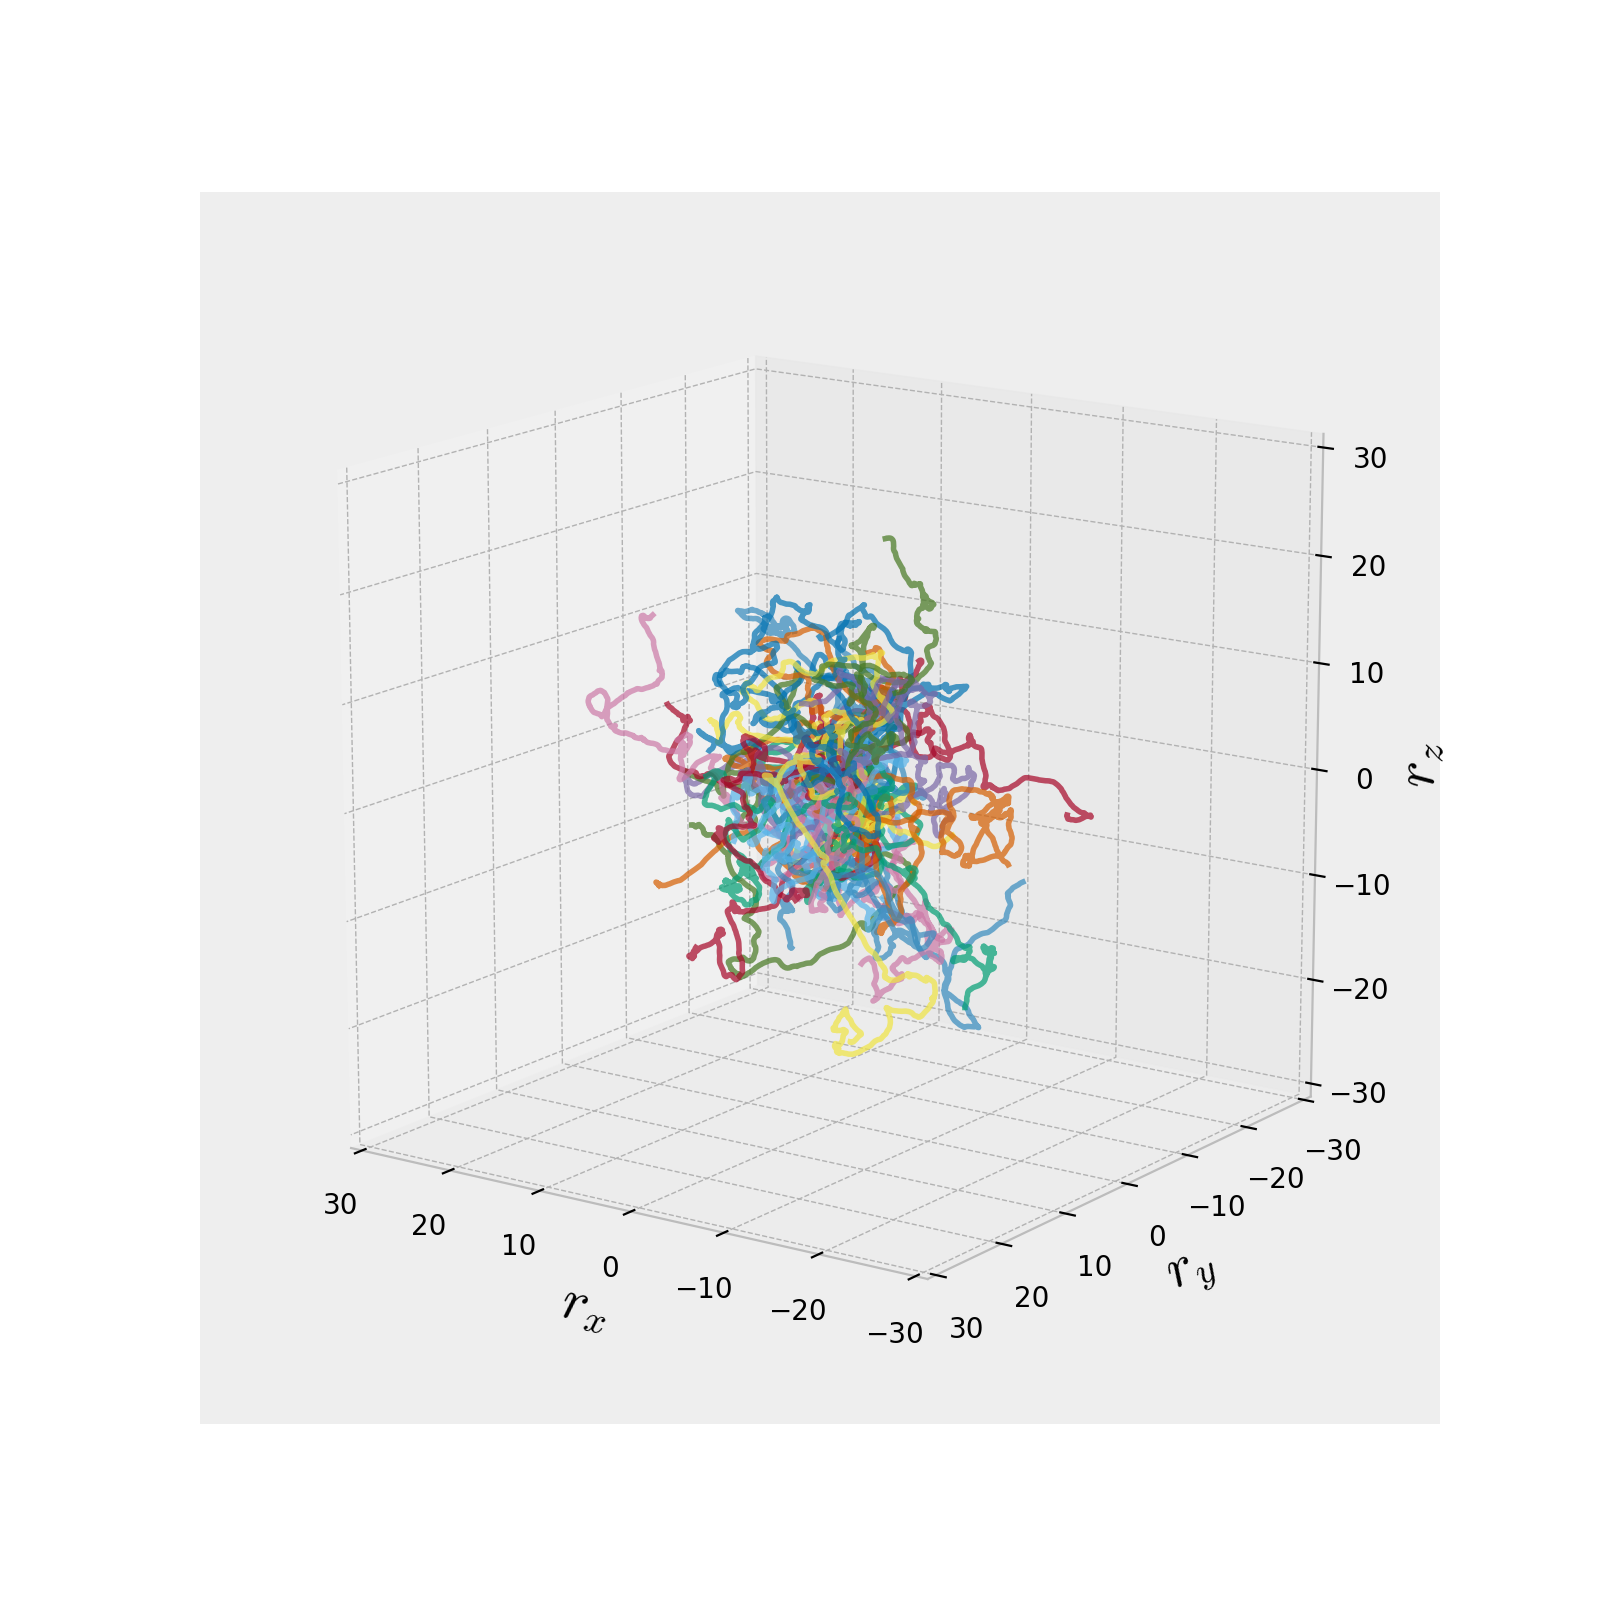

In [6]:
fig = plt.figure(figsize=(8,8), dpi=100) # 7x7 pulgadako tamainako figura sortuko da (zabalera x altuera)
ax = fig.add_subplot(111,projection='3d') # ardatz gehigarria sortu (2D)-ko estandarrari gehituz
ax.set_xlim(-30,30) # x-range
ax.set_ylim(-30,30) # y-range
ax.set_zlim(-30,30) # z-range
ax.set_xlabel(r"$r_x$",fontsize=20) # x-label
ax.set_ylabel(r"$r_y$",fontsize=20) # y-label
ax.set_zlabel(r"$r_z$",fontsize=20) # z-label
ax.view_init(elev=15,azim=125) # plot-a ze puntutatik ikusiko den aukera daiteke

for n in range(n_part): # errepikatu n=0-tik nump-1eraino
    ax.plot(R_t[:,n,0],R_t[:,n,1],R_t[:,n,2],alpha=0.7) # partikula guztien ibilbideak ploteatu
    
plt.show()

Oro har, lagungarria da 3D espazioko irudikapena ikustea. Gainera, jupyter notebook-ek 3Dn programatzeko erraztasun ugari ematen dizkigu (MATLABen bezala programa dezaket).


**Nondik lortu dudan hau egiteko prozedura:** https://hub.packtpub.com/creating-2d-3d-plots-using-matplotlib/:
*We start by importing the Axes3D class from the mpl_toolkits.mplot3d library, which is the Matplotlib object used for creating three-dimensional plots. We then define the Figure object and an Axes object with a 3D projection, as done in the following lines of code:*

fig = plt.figure(figsize=(12,6))

ax = fig.add_subplot(1,2,1,projection='3d')

*We are assigning the output of the figure() function call to the fig variable and then adding the subplot by calling the add_subplot() method from the fig object. \[...\]. Even in **the case of a single plot**, the add_subplot() method should be used, in which case the command would be **ax = fig.add_subplot(1,1,1,projection=’3d’)**.*

Hau da, 2D ardatz estandarrei beste ardatz bat gehitzen dio (fig.add_subplot, projection='3d'-rekin). 

\10. lerroan, ax.view_init komandoak, kameraren hasierako view point-a finkatzen du. 

Kasu hontan bai, argi geratzen dela simetria esferikoa duela jatorrian zentratutako ibilbideen errepresentazioak. 

In [ ]:
from matplotlib import rc

plt.rc('text',usetex=True)

fig.text(x,y,r'latexeko kodea')